In [3]:
# If needed, install chunknorris
%pip install chunknorris -q

Note: you may need to restart the kernel to use updated packages.


# In-depth .pdf file parsing
This tutorial shows you how to use the ``PdfParser`` efficiently.

In [12]:
from chunknorris.parsers import PdfParser
from IPython.display import Markdown

In [13]:
# Use the following block to parse a pdf file from an url

# import requests
# r = requests.get("myurl.pdf")
# data = r.content
# parser = PdfParser()
# parsed_doc = parser.parse_string(data)

In [30]:
path_to_pdf = "./data/sample.pdf" # Mitel phones user manual, 265 pages.

# Instanciate parser and parse (should take around 2s)
parser = PdfParser()
parsed_doc = parser.parse_file(path_to_pdf)

2024-12-16 14:01:ChunkNorris:INFO:Function "_create_spans" took 0.4723 seconds
2024-12-16 14:01:ChunkNorris:INFO:Function "get_tables" took 1.3617 seconds
2024-12-16 14:01:ChunkNorris:INFO:Function "parse_file" took 2.2170 seconds


As we can see, the total time elapsed to parse the 265 pages file is around 2s ! (including 1.3s to parse the table, and 0.47s to parse the text). This will vary depending on your hardware, the amount of tables in the document or the need to do OCR.

If you are certain your documents do not contain tables, or do not need OCR, you may use the following code to make it even faster :
```py
parser = PdfParser(
    extract_tables=False,
    use_ocr="never"
)
```

### Get the markdown string

In [54]:
# Let's view a sample of the document
md_string = parsed_doc.to_string()
Markdown(
    "___________\n[...]" + md_string[26400:34000] + "[...]\n_______________") 

___________
[...]Phone also supports the same accessories as the current 6930 IP Phone.**
### 2.1 About this Guide
This guide explains how to use the basic features of your new 6390SIP IP phone. Not all features listed are available by default. Contact your System or Network Administrator to find out which features and services are available to you on your system. Your System Administrator has the ability to customize some features on this phone. For information on more advanced settings and configurations, Administrators Sshould refer to the  **Mitel SIP IP Phones Administrator Guide**  .
### 2.2 Documentation
-  **Mitel 6930 SIP IP Phone Quick Reference Guide**  -  Contains call handling instructions, an overview of the User Interface (UI) and details on UI navigation, as well as information on other important features. The Quick Reference Guide can be downloaded from [http://www.miteldocs.com](http://www.aastra.com) .
-  **Mitel 6930 IP Phone Installation Guide**  -  Contains installation and set-up instructions, general features and functions, and basic options list customization. The Installation Guide can be downloaded from [http://www.miteldocs.com](http://www.aastra.com) .
-  **Mitel 6900 SIP IP Phones Administrator Guide**  -  Describes how to set up the Mitel SIP IP phones on the network and contains advanced configuration instructions. The Administrator Guide is intended for the System Administrator and can be downloaded from [http://www.miteldocs.com](http://www.mitel.com) .
### 2.3 Phone Features
The following table describes the IP Phone features:
User Guide 4
**Welcome**
|  Feature                        |  6930 IP Phone                                                                                          |  6930w IP Phone                                                                                                                                                      |
|:--------------------------------|:--------------------------------------------------------------------------------------------------------|:---------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| Display                         | 4.3” WQVGA (480x272) color TFT LCD display with brightness controls                                     | 4.3" WQVGA (480x272) color TFT LCD display with brightness controls                                                                                                  |
| Programmable Keys               | 12 top softkeys                                                                                         | 12 top softkeys                                                                                                                                                      |
| Context Sensitive Keys          | 5 context-sensitive bottom softkeys                                                                     | 5 context-sensitive bottom softkeys                                                                                                                                  |
| Ethernet                        | Built-in-two-port, 10/100/1000 Gigabit Ethernet switch - lets you share a connection with your computer | Built-in-two-port, 10/100/1000 Gigabit Ethernet switch - lets you share a connection with your computer 802.3az (EEE)                                                |
| Power-over-Ethernet (PoE) - LAN | 802.3af, 802.3at                                                                                        | 802.3af, 802.3at                                                                                                                                                     |
| POE Class                       | Class 3 with auto change to 4 when PKMs are attached.                                                   | Class 3 with auto change to 4 when PKMs are attached. If an accessory is installed in the sidecar accessory port, the phone must be powered using a 48v power brick. |
| Bluetooth Support               | Embedded Bluetooth 4.1                                                                                  | Embedded Bluetooth 5.2                                                                                                                                               |
| External USB Port               | 1x USB 2.0 (100mA) Host                                                                                 | 1x USB 2.0 (500mA) Host                                                                                                                                              |
| PC Link / Mobile Link           | Yes                                                                                                     | Yes                                                                                                                                                                  |
| 802.11n Wi-Fi                   | -                                                                                                       | Yes (built-in)                                                                                                                                                       |
| Antimicrobial Plastics          | No                                                                                                      | No                                                                                                                                                                   |
| DHSG Headset Support (H20/40)   | Yes                                                                                                     | Yes                                                                                                                                                                  |
5 User Guide
**Welcome**
|  Feature                                            |  6930 IP Phone                         |  6930w IP Phone                        |
|:----------------------------------------------------|:---------------------------------------|:---------------------------------------|
| USB Headset Support (H10/30/40)                     | Yes                                    | Yes                                    |
| S720 BT Speakerphone                                | Yes                                    | Yes                                    |
| Integrated DECT Headset                             | Yes                                    | Yes                                    |
| M695 Programmable Key Module                        | Yes (3 max)                            | Yes (3 max)                            |
| Press-and-hold Speed dial key configuration feature | Yes                                    | Yes                                    |
| Call Lines                                          | Supports up to 24 call lines with LEDs | Supports up to 24 call lines with LEDs |
| AC power adapter                                    | Yes. Sold separately                   | Yes. Sold separately                   |
| Supports Cordless Bluetooth handset                 | Yes                                    | Yes                                    |
**Note**  :
The  **6930L**  and  **6930Lt**  IP Phone variants do not contain Bluetooth circuitry and so do not support the related wireless functions. Any information within this document related to radio performance or functionality only relates to the fully functional 6[...]
_______________


As we can see, the output markdown looks fine. The title have been recognized and converted as markdown headers, as well as the tables.

Concerning the headers, ``chunknorris`` will attenmpt to find the table of content :
- In the file's metadata. 
- If not available it will attempt to find it in the document using regex
- If still not available it will infer the headers based to font size.

### Observe table of content

In [62]:
# Let's diplay the first elements of the table of content :
print(f"Amount of TOC items detected : {len(parser.toc)}.\nSample : ")
parser.toc[:4]

Amount of TOC items detected : 139.
Sample : 


[TocTitle(text='Contents', source='metadata', page=3, level=1, x_offset=None, source_page=None, found=True),
 TocTitle(text='What’s New', source='metadata', page=7, level=1, x_offset=None, source_page=None, found=True),
 TocTitle(text='Welcome', source='metadata', page=8, level=1, x_offset=None, source_page=None, found=True),
 TocTitle(text='About this Guide', source='metadata', page=10, level=2, x_offset=None, source_page=None, found=True)]

### Observe the detected tables

In [78]:
# You may also want to look at the tables detected
print(f"Amount of tables detected : {len(parser.tables)}")
table_idx = 2 # Choose the idx you want
Markdown(parser.tables[table_idx].to_markdown())

Amount of tables detected : 84


|  Feature                                            |  6930 IP Phone                         |  6930w IP Phone                        |
|:----------------------------------------------------|:---------------------------------------|:---------------------------------------|
| USB Headset Support (H10/30/40)                     | Yes                                    | Yes                                    |
| S720 BT Speakerphone                                | Yes                                    | Yes                                    |
| Integrated DECT Headset                             | Yes                                    | Yes                                    |
| M695 Programmable Key Module                        | Yes (3 max)                            | Yes (3 max)                            |
| Press-and-hold Speed dial key configuration feature | Yes                                    | Yes                                    |
| Call Lines                                          | Supports up to 24 call lines with LEDs | Supports up to 24 call lines with LEDs |
| AC power adapter                                    | Yes. Sold separately                   | Yes. Sold separately                   |
| Supports Cordless Bluetooth handset                 | Yes                                    | Yes                                    |

To parse tables, ``chunknorris`` uses the "lines" visible on the pages. Please take note that the tables that have a suggested structure (i.e. no lines) **may not be detected as tables**. Most of the time, that won't be a problem as such tables displayed as text will **still be well undersood by LLMs**.

### Visualize the parsed pdf
You may want to "plot" the parsed pdf file. This can help you :
- debug
- visualize which tables have been detected
- visualize which elements have been detected has page headers/footers
- ...

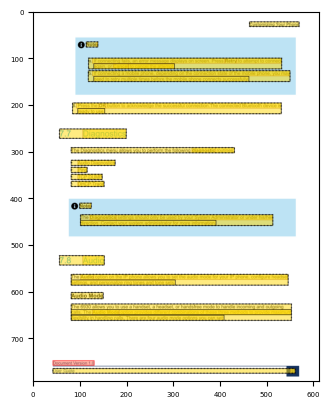

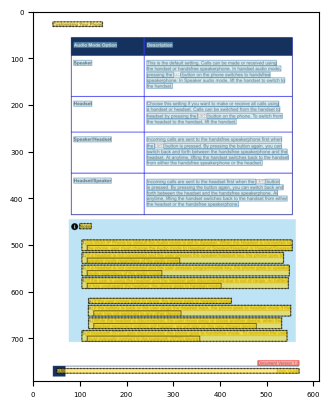

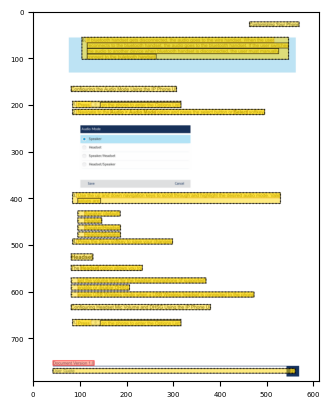

In [83]:
# Let's plot the parsed pdf
parser.plot_pdf(page_start=75, page_end=78, dpi=100) # avoid displaying more that 20 pages at a time as matplotlib uses lots of RAM

The plotted pdf elements are :
- headers/footers in **red**
- tables in **blue**
- text in **yellow** including :
    - text *lines* surrounded by black thin lines
    - text *blocks* (= group of lines) surrounded with dashed black lines